<a href="https://colab.research.google.com/github/hcm234/repo/blob/master/trabajofinalmacro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-23-8cb2ba337593>:14: RuntimeWarning: divide by zero encountered in reciprocal
  return np.where(c > 0, (c**(1 - sigma)) / (1 - sigma), -np.inf)


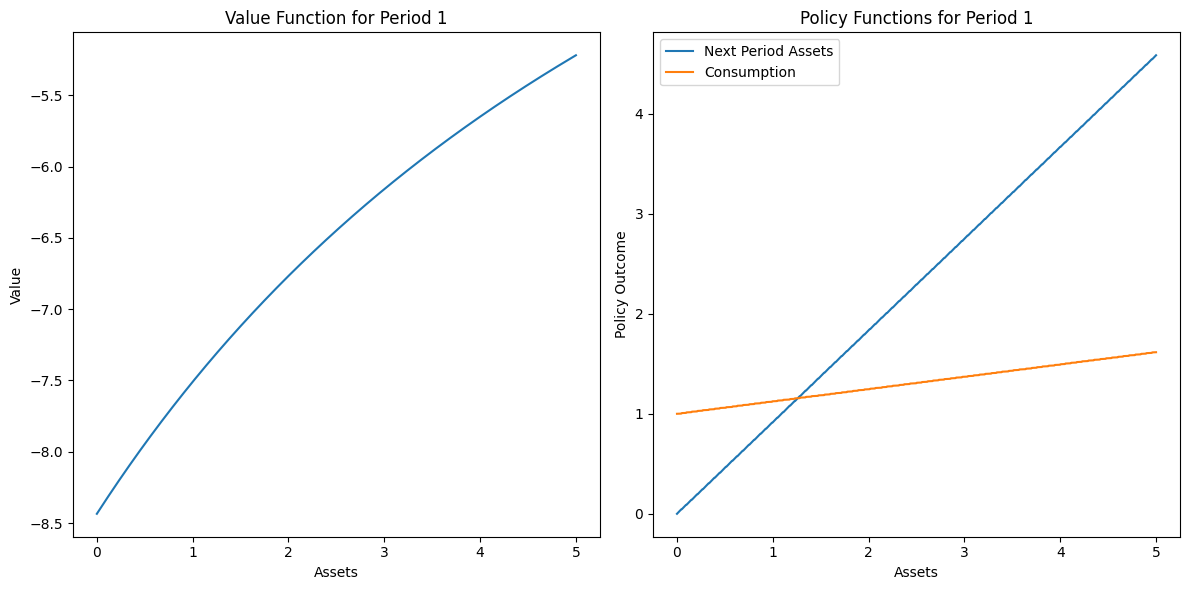

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
T = 10  # Total number of periods
sigma = 2  # Coefficient of relative risk aversion
beta = 1 / (1 + 0.04)  # Discount factor
r = 0.04  # Interest rate
a0 = 1  # Initial asset value
yt = 1  # Income for all periods

# Define utility function
def u(c):
    return np.where(c > 0, (c**(1 - sigma)) / (1 - sigma), -np.inf)

# Specify asset grid
assets_grid = np.linspace(0, 5, 1000)

# Initialize value function and policy function arrays
V = np.zeros((len(assets_grid), T+1))  # Adjusted to include terminal period
saving_pol_fn = np.zeros((len(assets_grid), T), dtype=int)  # No need for policy in terminal period

# Solve the value function backwards
for t in range(T - 1, -1, -1):
    for i, a in enumerate(assets_grid):
        # Calculate consumption and next period's assets for all possible choices of next assets
        consumption_options = (1 + r) * a + yt - assets_grid
        utility = u(consumption_options)
        expected_value = utility + beta * V[:, t+1]  # Shifted by 1 due to terminal period adjustment
        max_value_index = np.argmax(expected_value)

        V[i, t] = expected_value[max_value_index]
        saving_pol_fn[i, t] = max_value_index

# Plot the value function and policy functions for the first period
plt.figure(figsize=(12, 6))

# Value function for the first period
plt.subplot(1, 2, 1)
plt.plot(assets_grid, V[:, 0], label='Value Function')
plt.title('Value Function for Period 1')
plt.xlabel('Assets')
plt.ylabel('Value')

# Policy function for assets for the next period
plt.subplot(1, 2, 2)
next_assets = assets_grid[saving_pol_fn[:, 0]]
plt.plot(assets_grid, next_assets, label='Next Period Assets')
plt.plot(assets_grid, (1 + r) * assets_grid + yt - next_assets, label='Consumption')
plt.title('Policy Functions for Period 1')
plt.xlabel('Assets')
plt.ylabel('Policy Outcome')
plt.legend()

plt.tight_layout()
plt.show()



Para la parte B

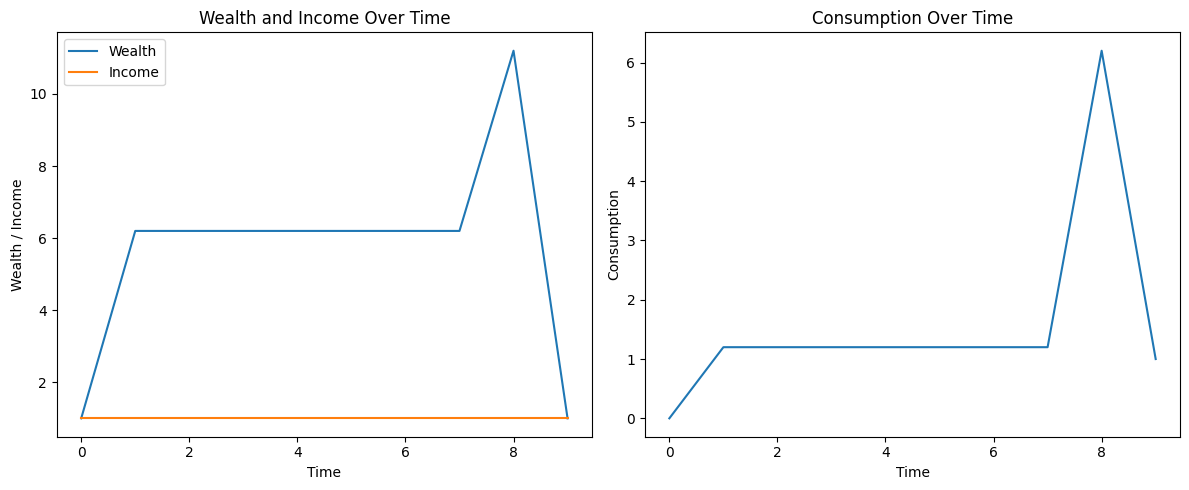

In [ ]:
# Calculate sequence of consumption using budget constraint
consumption_sequence = []
wealth_sequence = []

for t in range(T - 1):  # Iterate up to T - 1
    asset_value = max(assets_grid[asset_indices[t]], 0)
    next_asset_value = max(assets_grid[asset_indices[t + 1]], 0)
    consumption = max((1 + r) * asset_value + yt - next_asset_value, 0)
    consumption_sequence.append(consumption)
    wealth_sequence.append(max(asset_value + consumption, 0))

# Calculate consumption and wealth for the last period separately
asset_value_last_period = max(assets_grid[asset_indices[T - 1]], 0)
consumption_last_period = max((1 + r) * asset_value_last_period + yt, 0)
consumption_sequence.append(consumption_last_period)
wealth_sequence.append(max(asset_value_last_period + consumption_last_period, 0))

# Simulate sequence of income over agent's lifetime (assuming constant income)
income_sequence = [yt] * T

# Plot the simulation results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(T), wealth_sequence, label='Wealth')
plt.plot(range(T), income_sequence, label='Income')
plt.title('Wealth and Income Over Time')
plt.xlabel('Time')
plt.ylabel('Wealth / Income')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(T), consumption_sequence)
plt.title('Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Consumption')

plt.tight_layout()
plt.show()

